In [6]:
suppressMessages(suppressWarnings(source("config.R")))

http://jaspar.genereg.net/matrix/MA0113.3/
```
Name: NR3C1
Matrix ID: MA0113.3
Class: Nuclear receptors with C4 zinc fingers
Family: Steroid hormone receptors (NR3)
Species: Homo sapiens
Uniprot ID: P04150  
```

http://jaspar.genereg.net/matrix/MA0099.3/
```
Name: FOS::JUN
Matrix ID: MA0099.3
Class: Basic leucine zipper factors (bZIP)::Basic leucine zipper factors (bZIP)
Family: Fos-related factors::Jun-related factors
Species: Homo sapiens
Uniprot ID: P01100   P05412
```

In [2]:
fdiry = "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0113.3.bedpe"
Sys.glob(fdiry)

[1] "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0113.3.bedpe"

In [3]:
fdiry = "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0099.3.bedpe"
Sys.glob(fdiry)

[1] "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0099.3.bedpe"

In [4]:
fdiry  = "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/"
chrom  = "chr17_"
fnames = c(
    "MA0113.3",
    "MA0509.2", "MA0473.3", "MA0159.1", "MA0729.1", "MA1149.1", "MA0024.3", "MA0018.4", "MA0472.2", "MA0474.2", "MA0823.1",
    "MA0099.3", "MA1127.1", "MA1128.1", "MA1134.1", "MA0488.1", "MA0476.1",
    "MA0526.3", "MA0499.2", "MA0104.4", "MA0002.1", "MA0105.4", "MA0778.1", "MA0473.3", "MA0007.2", "MA0058.3", "MA0059.1"
)

fpaths = paste0(fdiry, chrom, fnames, "*")
fpaths = Sys.glob(fpaths)
print(fpaths)

 [1] "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0113.3.bedpe"
 [2] "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0509.2.bedpe"
 [3] "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0473.3.bedpe"
 [4] "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0159.1.bedpe"
 [5] "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0729.1.bedpe"
 [6] "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA1149.1.bedpe"
 [7] "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0024.3.bedpe"
 [8] "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0018.4.bedpe"
 [9] "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0472.2.bedpe"
[10] "/data/reddylab/Kuei/out/CombEffect_STARR/annotation_segment/TFX_Dex/PER1/chr17_MA0474

## Import data

In [7]:
fpath = fpaths[1]
tmp = str_match(string=fpath, pattern="chr17_(.*).bedpe")
print(tmp)

     [,1]                   [,2]      
[1,] "chr17_MA0113.3.bedpe" "MA0113.3"


In [8]:
###
cnames = c(
    "chrom_seg", "start_seg", "end_seg",
    "chrom_ann", "start_ann", "end_ann",
    "TF", "score", "nlog10_pval", "strand",
    "overlap")
ctypes = c(
    col_character(), col_double(), col_double(),
    col_character(), col_double(), col_double(),
    col_character(), col_double(), col_double(),
    col_character(), col_double())

###
lst_annot = lapply(fpaths, function(fpath){
    tmp   = str_match(string=fpath, pattern="chr17_(.*).bedpe")
    motif = tmp[1,2]
    
    dat = read_tsv(
        fpath, 
        col_names = cnames, 
        col_types = ctypes)
    
    dat = dat %>% mutate(TF = paste(motif, TF, sep="_"))
    return(dat)
})

In [9]:
lapply(lst_annot, head, 2)

chrom_seg,start_seg,end_seg,chrom_ann,start_ann,end_ann,TF,score,nlog10_pval,strand,overlap
chr17,8151910,8151912,chr17,8151910,8151927,MA0113.3_NR3C1,910,547,+,2
chr17,8151910,8151912,chr17,8151910,8151927,MA0113.3_NR3C1,887,501,-,2
chrom_seg,start_seg,end_seg,chrom_ann,start_ann,end_ann,TF,score,nlog10_pval,strand,overlap
chr17,8151305,8151308,chr17,8151305,8151319,MA0509.2_RFX1,861,422,+,3
chr17,8151308,8151311,chr17,8151305,8151319,MA0509.2_RFX1,861,422,+,3
chrom_seg,start_seg,end_seg,chrom_ann,start_ann,end_ann,TF,score,nlog10_pval,strand,overlap
chr17,8149330,8149348,chr17,8149336,8149350,MA0473.3_ELF1,814,359,-,12
chr17,8149348,8149357,chr17,8149336,8149350,MA0473.3_ELF1,814,359,-,2
chrom_seg,start_seg,end_seg,chrom_ann,start_ann,end_ann,TF,score,nlog10_pval,strand,overlap
chr17,8149750,8149751,chr17,8149750,8149767,MA0159.1_RARA::RXRA,812,409,-,1


In [11]:
dat_annot = bind_rows(lst_annot)
head(dat_annot)

chrom_seg,start_seg,end_seg,chrom_ann,start_ann,end_ann,TF,score,nlog10_pval,strand,overlap
chr17,8151910,8151912,chr17,8151910,8151927,MA0113.3_NR3C1,910,547,+,2
chr17,8151910,8151912,chr17,8151910,8151927,MA0113.3_NR3C1,887,501,-,2
chr17,8151912,8151916,chr17,8151910,8151927,MA0113.3_NR3C1,910,547,+,4
chr17,8151912,8151916,chr17,8151910,8151927,MA0113.3_NR3C1,887,501,-,4
chr17,8151916,8151917,chr17,8151910,8151927,MA0113.3_NR3C1,910,547,+,1
chr17,8151916,8151917,chr17,8151910,8151927,MA0113.3_NR3C1,887,501,-,1


In [12]:
dat_annot = bind_rows(lst_annot)
dat_annot = dat_annot %>% mutate(segment = paste(chrom_seg, start_seg, end_seg, sep="-"))
dat_annot = dat_annot %>% 
    dplyr::select(segment, TF) %>% 
    distinct %>% 
    mutate(value=1) %>% 
    tidyr::spread(TF, value, fill=0)
head(dat_annot)

segment,MA0018.4_CREB1,MA0024.3_E2F1,MA0058.3_MAX,MA0059.1_MAX::MYC,MA0099.3_FOS::JUN,MA0104.4_MYCN,MA0105.4_NFKB1,MA0113.3_NR3C1,MA0159.1_RARA::RXRA,...,MA0499.2_MYOD1,MA0509.2_RFX1,MA0526.3_USF2,MA0729.1_RARA,MA0778.1_NFKB2,MA0823.1_HEY1,MA1127.1_FOSB::JUN,MA1128.1_FOSL1::JUN,MA1134.1_FOS::JUNB,MA1149.1_RARA::RXRG
chr17-8148988-8149016,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
chr17-8149016-8149018,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
chr17-8149051-8149062,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
chr17-8149062-8149063,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
chr17-8149063-8149072,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
chr17-8149072-8149101,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
dim(dat_annot)

[1] 1037   25

## Import counts

In [14]:
suppressMessages(suppressWarnings(source("config.R")))

In [16]:
fdiry = "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_*.bed"
fpaths = Sys.glob(fdiry)
fpaths

[1] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_Input1.bed"   
 [2] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_Input2.bed"   
 [3] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_Input3.bed"   
 [4] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_Input4.bed"   
 [5] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_Input5.bed"   
 [6] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_TFX2_Dex.bed" 
 [7] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_TFX2_DMSO.bed"
 [8] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_TFX3_Dex.bed" 
 [9] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_TFX3_DMSO.bed"
[10] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_TFX4_Dex.bed" 
[11] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_TFX4_DMSO.bed"
[12] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_TFX5_Dex.bed" 
[13] "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_TFX5_DMSO.bed"

In [22]:
###
fdiry = "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/cnt_PER1_chr17_*.bed"
fpaths = Sys.glob(fdiry)

###
cnames = c("Chrom", "Start", "End", "Count")
ctypes = c(col_character(), col_double(), col_double(), col_double())
    
###
lst_cnt = lapply(fpaths, function(fpath){
    ###
    sam = str_match(
        string = fpath, 
        pattern = ".*/cnt_PER1_chr17_(.*).bed")
    sam = sam[1,2] # since str_match return a matrix, need to get the matched string
    
    ###
    dat = read_tsv(
        fpath, 
        col_names = cnames, 
        col_types = ctypes)
    
    ###
    dat = dat %>% mutate(Sample=sam)
    return(dat)
})

In [23]:
head(lst_cnt[[1]])

Chrom,Start,End,Count,Sample
chr17,8148987,8148988,10,Input1
chr17,8148988,8149016,10,Input1
chr17,8149016,8149018,9,Input1
chr17,8149018,8149019,9,Input1
chr17,8149019,8149023,9,Input1
chr17,8149023,8149029,9,Input1


In [24]:
dat_cnt = bind_rows(lst_cnt)
dat_cnt = dat_cnt %>% 
    tidyr::spread(Sample, Count, fill=NA) %>% 
    mutate(segment=paste(Chrom, Start, End, sep="-")) %>%
    dplyr::select(-Chrom, -Start, -End) %>% 
    na.omit
head(dat_cnt)

Input1,Input2,Input3,Input4,Input5,TFX2_Dex,TFX2_DMSO,TFX3_Dex,TFX3_DMSO,TFX4_Dex,TFX4_DMSO,TFX5_Dex,TFX5_DMSO,segment
10,18,13,8,8,39,97,34,35,18,30,35,20,chr17-8148987-8148988
10,21,16,11,9,39,97,34,35,20,30,35,20,chr17-8148988-8149016
9,21,15,11,9,36,96,34,35,20,30,39,15,chr17-8149016-8149018
9,21,15,11,9,36,96,34,35,20,30,40,15,chr17-8149018-8149019
9,21,16,11,9,36,96,34,35,20,30,41,15,chr17-8149019-8149023
9,20,16,10,8,36,96,34,35,20,30,42,15,chr17-8149023-8149029


In [25]:
dim(dat_cnt)

[1] 3459   14

In [26]:
head(dat_annot, 3)

segment,MA0018.4_CREB1,MA0024.3_E2F1,MA0058.3_MAX,MA0059.1_MAX::MYC,MA0099.3_FOS::JUN,MA0104.4_MYCN,MA0105.4_NFKB1,MA0113.3_NR3C1,MA0159.1_RARA::RXRA,...,MA0499.2_MYOD1,MA0509.2_RFX1,MA0526.3_USF2,MA0729.1_RARA,MA0778.1_NFKB2,MA0823.1_HEY1,MA1127.1_FOSB::JUN,MA1128.1_FOSL1::JUN,MA1134.1_FOS::JUNB,MA1149.1_RARA::RXRG
chr17-8148988-8149016,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
chr17-8149016-8149018,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
chr17-8149051-8149062,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
dat = left_join(dat_cnt, dat_annot, by="segment")
head(dat)

Input1,Input2,Input3,Input4,Input5,TFX2_Dex,TFX2_DMSO,TFX3_Dex,TFX3_DMSO,TFX4_Dex,...,MA0499.2_MYOD1,MA0509.2_RFX1,MA0526.3_USF2,MA0729.1_RARA,MA0778.1_NFKB2,MA0823.1_HEY1,MA1127.1_FOSB::JUN,MA1128.1_FOSL1::JUN,MA1134.1_FOS::JUNB,MA1149.1_RARA::RXRG
10,18,13,8,8,39,97,34,35,18,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,21,16,11,9,39,97,34,35,20,...,0,0,0,0,1,0,0,0,0,0
9,21,15,11,9,36,96,34,35,20,...,0,0,0,0,1,0,0,0,0,0
9,21,15,11,9,36,96,34,35,20,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,21,16,11,9,36,96,34,35,20,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,20,16,10,8,36,96,34,35,20,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [28]:
###
mat_annot = dat %>% dplyr::select(segment, starts_with("MA"))
mat_annot = mapply(mat_annot, FUN=as.character)
mat_annot = mat_annot %>%
    as.data.frame %>%
    replace(is.na(.), "0") %>%
    remove_rownames %>% 
    column_to_rownames(var="segment")

###
mat_cnt = dat %>% 
    dplyr::select(-starts_with("MA")) %>% 
    remove_rownames %>% 
    column_to_rownames(var="segment")

###
cnames = c(
    paste0("Input", 1:5), 
    paste0("TFX", 2:5, "_DMSO"), 
    paste0("TFX", 2:5, "_Dex"))
mat_cnt = t(mat_cnt)[cnames, ]

In [29]:
head(mat_annot, 3)

,MA0018.4_CREB1,MA0024.3_E2F1,MA0058.3_MAX,MA0059.1_MAX::MYC,MA0099.3_FOS::JUN,MA0104.4_MYCN,MA0105.4_NFKB1,MA0113.3_NR3C1,MA0159.1_RARA::RXRA,MA0472.2_EGR2,...,MA0499.2_MYOD1,MA0509.2_RFX1,MA0526.3_USF2,MA0729.1_RARA,MA0778.1_NFKB2,MA0823.1_HEY1,MA1127.1_FOSB::JUN,MA1128.1_FOSL1::JUN,MA1134.1_FOS::JUNB,MA1149.1_RARA::RXRG
chr17-8148987-8148988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr17-8148988-8149016,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
chr17-8149016-8149018,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
head(mat_cnt, 3)

,chr17-8148987-8148988,chr17-8148988-8149016,chr17-8149016-8149018,chr17-8149018-8149019,chr17-8149019-8149023,chr17-8149023-8149029,chr17-8149029-8149050,chr17-8149050-8149051,chr17-8149051-8149062,chr17-8149062-8149063,...,chr17-8157410-8157418,chr17-8157418-8157436,chr17-8157436-8157440,chr17-8157440-8157441,chr17-8157441-8157442,chr17-8157442-8157443,chr17-8157443-8157446,chr17-8157446-8157448,chr17-8157448-8157450,chr17-8157450-8157451
Input1,10,10,9,9,9,9,10,10,10,10,...,8,8,7,7,7,7,7,7,7,7
Input2,18,21,21,21,21,20,21,21,21,21,...,6,6,6,6,6,6,6,6,6,6
Input3,13,16,15,15,16,16,16,16,16,16,...,14,14,14,14,14,14,14,14,14,14


In [31]:
col_annot = list()
for (x in colnames(mat_annot)){
    col_annot[[x]] = c("0"="grey90", "1"="grey10")
}
col_annot[["MA0113.3_NR3C1"]] = c("0"="#deebf7", "1"="#3182bd")
col_annot[["MA0488.1_JUN"]]   = c("0"="#deebf7", "1"="#3182bd")
col_annot[["MA0476.1_FOS"]]   = c("0"="#deebf7", "1"="#3182bd")

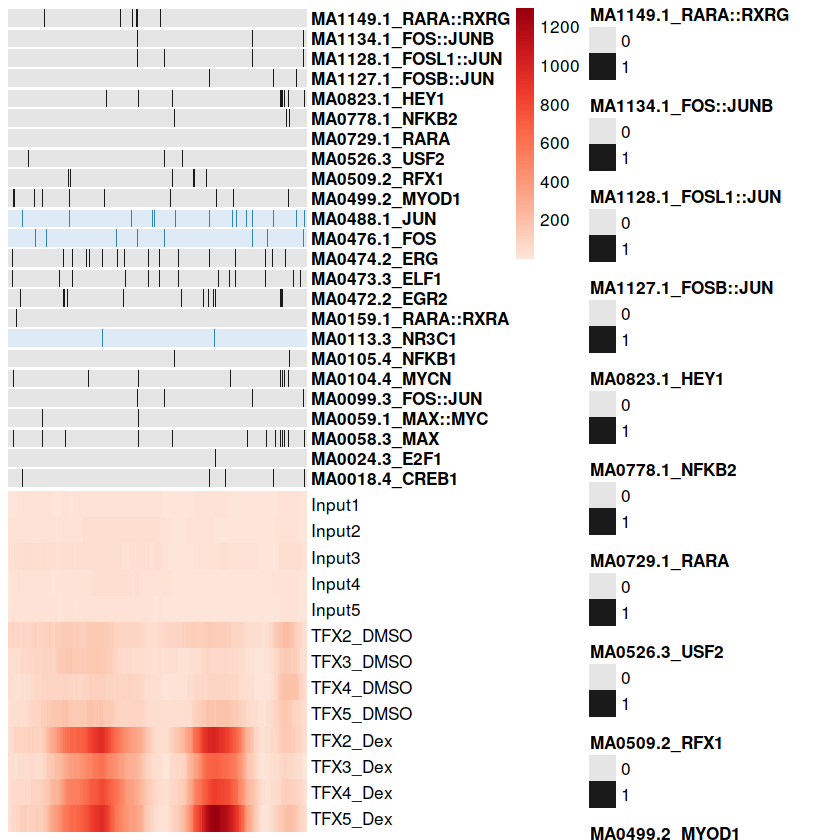

In [32]:
pheatmap(
    mat_cnt, 
    annotation_col = mat_annot, 
    annotation_colors = col_annot,
    cluster_cols  = FALSE, 
    cluster_rows  = FALSE,
    show_colnames = FALSE,
    color = colorRampPalette(brewer.pal(n = 7, name ="Reds"))(100)
)

## Distribution of counts

In [34]:
dat = dat_cnt %>% 
    gather(Sample, Count, -segment) %>% 
    mutate(Group=str_remove(string=Sample, pattern="[0-9]"))
head(dat)

segment,Sample,Count,Group
chr17-8148987-8148988,Input1,10,Input
chr17-8148988-8149016,Input1,10,Input
chr17-8149016-8149018,Input1,9,Input
chr17-8149018-8149019,Input1,9,Input
chr17-8149019-8149023,Input1,9,Input
chr17-8149023-8149029,Input1,9,Input


In [35]:
dim(dat)

[1] 44967     4

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 360 rows containing missing values (geom_bar).”

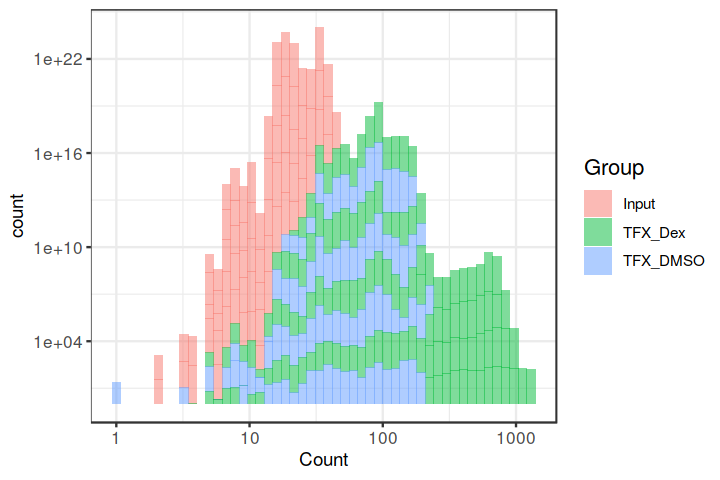

In [36]:
options(repr.plot.height=4, repr.plot.width=6)

ggplot(dat, aes(x=Count, group=Sample, fill=Group)) + 
    geom_histogram(bins=50, alpha = 0.5) + 
    scale_x_log10() +     
    scale_y_log10() + 
    theme_bw() +
    theme(
        title      = element_text(size=13),
        axis.title = element_text(size=11),
        axis.text  = element_text(size=10)
    )

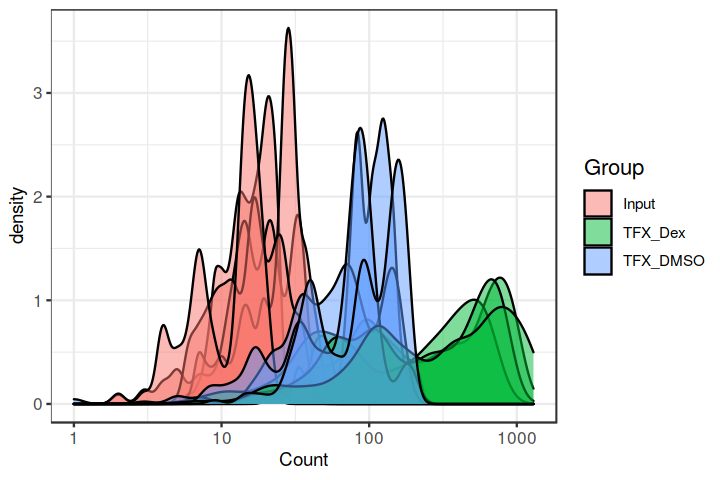

In [37]:
options(repr.plot.height=4, repr.plot.width=6)

ggplot(dat, aes(x=Count, group=Sample, fill=Group)) + 
    geom_density(n=500, alpha = 0.5) + 
    scale_x_log10() + 
    theme_bw() +
    theme(
        title      = element_text(size=13),
        axis.title = element_text(size=11),
        axis.text  = element_text(size=10)
    )